# Context
The MNIST digits dataset is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

# Objective
To implement the techniques learnt as a part of the course.

# Learning Outcomes
- Pre-processing of image data.
- Visualization of images.
- Building CNN.
- Evaluate the Model.

## 1.1 Import libraries and load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

## 1.2 Shape of the dataset

In [3]:
print("-- Shape --")
print('Train:', x_train.shape, y_train.shape)
print('Test: ', x_test.shape, y_test.shape)

-- Shape --
Train: (60000, 28, 28) (60000,)
Test:  (10000, 28, 28) (10000,)


In [4]:
print("-- Pixel values --")
print('Train:', x_train.min(), x_train.mean(), x_train.std(), x_train.max())
print('Test: ', x_test.min(), x_test.mean(), x_test.std(), x_test.max())

-- Pixel values --
Train: 0 33.318421449829934 78.56748998339798 255
Test:  0 33.791224489795916 79.17246322228644 255


## 1.3 Visualize the images

In [5]:
num = 9
first_index = np.where(y_train==num)[0][0]
x_train[first_index]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

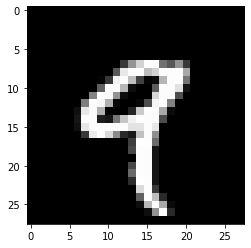

In [6]:
plt.imshow(x_train[first_index], cmap='gray')

In [7]:
first_index = np.where(y_test==num)[0][0]
x_test[first_index]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

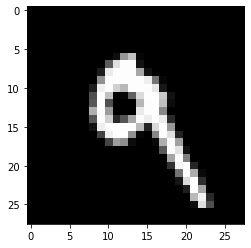

In [8]:
plt.imshow(x_test[first_index], cmap='gray')

In [9]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

In [10]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 980,
 1: 1135,
 2: 1032,
 3: 1010,
 4: 982,
 5: 892,
 6: 958,
 7: 1028,
 8: 974,
 9: 1009}

* Both train and test sets are well-balanced in regard to the number of values in each digit

## 2.1 Data pre-processing: Normalization + Gaussian Blurring

In [11]:
x_train = x_train.astype('float32') # Conversion to float type from integer type.
x_test = x_test.astype('float32')
x_train /= 255.0 # Division by 255
x_test /= 255.0

In [12]:
import cv2

for idx, line in enumerate(x_train):
    x_train[idx] = cv2.GaussianBlur(line, (5, 5), 0)
for idx, line in enumerate(x_test):
    x_test[idx] = cv2.GaussianBlur(line, (5, 5), 0)

## 2.2 Visualize data after pre-processing

In [13]:
first_index = np.where(y_train==num)[0][0]
x_train[first_index]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

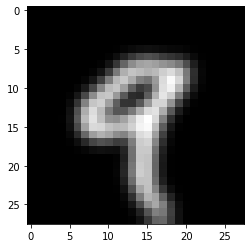

In [14]:
plt.imshow(x_train[first_index], cmap='gray')

In [15]:
first_index = np.where(y_test==num)[0][0]
x_test[first_index]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

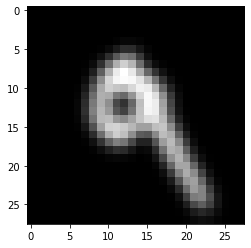

In [16]:
plt.imshow(x_test[first_index], cmap='gray')

## 3.1 Reshape data into shapes compatible with Keras models

In [17]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print("-- After reshape --")
print('Train:', x_train.shape, y_train.shape)
print('Test: ', x_test.shape, y_test.shape)

-- After reshape --
Train: (60000, 28, 28, 1) (60000,)
Test:  (10000, 28, 28, 1) (10000,)


## 3.2 Convert labels from digits to one hot vectors

In [18]:
import tensorflow

# Convert categorical target field to dummy fields
y_train_onehot = tensorflow.keras.utils.to_categorical(y_train, 10)
y_test_onehot = tensorflow.keras.utils.to_categorical(y_test, 10)

## 3.3 Print the label for y_train_onehot[0]

In [19]:
y_train_onehot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## 4.1 Define CNN layers

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout

# Clear the session and set a random seed
tensorflow.keras.backend.clear_session()
tensorflow.random.set_seed(1)

import os.path
from tensorflow.keras.models import load_model

model_path = './classifier.h5'
if os.path.isfile(model_path):
    classifier = load_model(model_path)
else:
    # Initialising the CNN classifier
    classifier = Sequential()

    # Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
    classifier.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu', padding = 'same'))

    # Add a Max Pooling layer of size 2X2
    classifier.add(MaxPooling2D(pool_size = (2, 2)))

    # Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
    classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

    # Adding another pooling layer
    classifier.add(MaxPooling2D(pool_size = (2, 2)))

    # Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
    classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'valid'))

    # Adding another pooling layer
    classifier.add(MaxPooling2D(pool_size = (2, 2)))

    # Flattening the layer before fully connected layers
    classifier.add(Flatten())

    # Adding a fully connected layer with 512 neurons
    classifier.add(Dense(units = 512, activation = 'relu'))

    # Adding dropout with probability 0.5
    classifier.add(Dropout(0.5))


    # Adding a fully connected layer with 128 neurons
    classifier.add(Dense(units = 128, activation = 'relu'))


    # The final output layer with 10 neurons to predict the categorical classifcation
    classifier.add(Dense(units = 10, activation = 'softmax'))

## 4.2 Set optimizer and loss function

In [21]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## 5. Fit and evaluate model

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model_weights_path = './classifier_weights.h5'

# Add constraints and record best weights to resume 
callbacks = [
    EarlyStopping(
        monitor='val_loss',             # Monitor validation loss history
        min_delta=0.001,                # Stop training when validation loss is no longer improving by at least 0.001
        patience=10,                    # Look at validation loss improvement over the last 10 epochs
        verbose=1), 
    
    ModelCheckpoint(model_weights_path,
       monitor='val_loss',
       verbose=1,
       save_best_only=True,
       save_weights_only=True,
       mode='auto')
]

if os.path.isfile(model_path):
    classifier.load_weights(model_weights_path)

# Train the model
classifier.fit(x_train, y_train_onehot, validation_split = 0.2, epochs = 50, callbacks=callbacks, verbose = 1)

# Test set accuracy
classifier.evaluate(x_test, y_test_onehot, verbose=0)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
47968/48000 [============================>.] - ETA: 0s - loss: 0.0202 - accuracy: 0.9936 ETA: 1s - l
Epoch 00001: val_loss improved from inf to 0.04063, saving model to ./classifier_weights.h5
48000/48000 [==============================] - 94s 2ms/sample - loss: 0.0202 - accuracy: 0.9936 - val_loss: 0.0406 - val_accuracy: 0.9905
Epoch 2/50
47968/48000 [============================>.] - ETA: 0s - loss: 0.0174 - accuracy: 0.9947
Epoch 00002: val_loss improved from 0.04063 to 0.03657, saving model to ./classifier_weights.h5
48000/48000 [==============================] - 100s 2ms/sample - loss: 0.0174 - accuracy: 0.9947 - val_loss: 0.0366 - val_accuracy: 0.9911
Epoch 3/50
47968/48000 [============================>.] - ETA: 0s - loss: 0.0181 - accuracy: 0.9943
Epoch 00003: val_loss did not improve from 0.03657
48000/48000 [==============================] - 84s 2ms/sample - loss: 0.0181 - accuracy: 0.9943 - val_loss: 0.0428 - val_a

[0.08038036180561856, 0.9878]

* Test accuracy should be more than 90%

In [23]:
if not(os.path.isfile(model_path)):
    classifier.save('./classifier.h5')

## 6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]

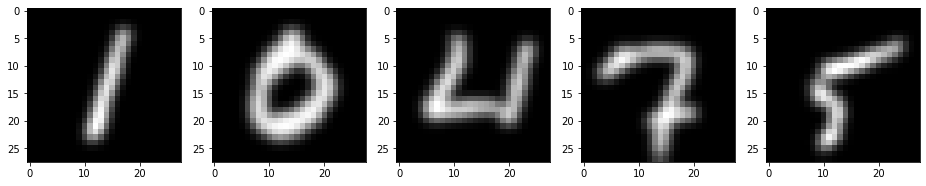

In [24]:
indexes = [2, 3, 33, 36, 59]

fig=plt.figure(figsize=(16, 16))
columns = 5
rows = len(indexes)/columns + 1
for i in range(0, len(indexes)):
    img = x_test[indexes[i]].reshape(28,28)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img, cmap='gray')
plt.show()

In [25]:
result = classifier.predict(x_test[indexes].reshape(len(indexes), 28, 28, 1))
print("Predicted: " + str(np.argmax(result, axis=1)))

Predicted: [1 0 4 7 5]
